In [1]:
pip install deepface opencv-python numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.3 MB/s eta 0:00:00


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5


25-12-28 11:02:58 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


100%|██████████| 119M/119M [00:00<00:00, 195MB/s] 


Saved: /content/cropped_roughidd1/face_1.jpg
Saved: /content/cropped_roughidd1/face_2.jpg
Saved: /content/cropped_roughidd1/face_3.jpg
Saved: /content/cropped_roughidd1/face_4.jpg
Saved: /content/cropped_roughidd1/face_5.jpg
Saved: /content/cropped_roughidd1/face_6.jpg
Saved: /content/cropped_roughidd1/face_7.jpg
Saved: /content/cropped_roughidd1/face_8.jpg
Saved: /content/cropped_roughidd1/face_9.jpg
Saved: /content/cropped_roughidd1/face_10.jpg
Saved: /content/cropped_roughidd1/face_11.jpg
Saved: /content/cropped_roughidd1/face_12.jpg


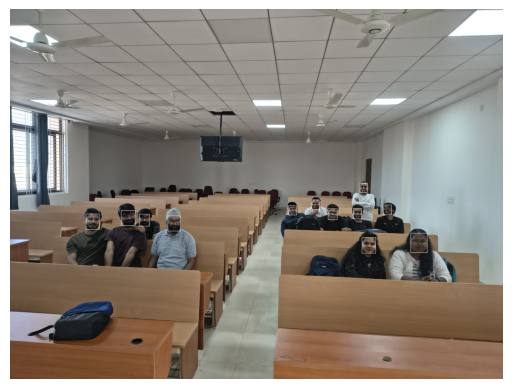

In [6]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
import os
from deepface import DeepFace

img_path = "/content/testing_idd5 (2).jpg"
output_folder = "/content/cropped_roughidd1"


img = cv2.imread(img_path)
detected_faces = RetinaFace.detect_faces(img_path)


os.makedirs(output_folder, exist_ok=True)


counter = 1
for key, face_data in detected_faces.items():
    x1, y1, x2, y2 = face_data["facial_area"]

    cropped_face = img[y1:y2, x1:x2]

    save_path = os.path.join(output_folder, f"face_{counter}.jpg")
    cv2.imwrite(save_path, cropped_face)
    print(f"Saved: {save_path}")

    counter += 1


for key, face_data in detected_faces.items():
    x1, y1, x2, y2 = face_data["facial_area"]
    cv2.rectangle(img, (x1, y1), (x2, y2), (511, 511, 511), 2)


plt.imshow(img[:, :, ::-1])
plt.axis("off")
plt.show()



# result = DeepFace.verify(
#     img1_path="deep1.jpeg",
#     img2_path="dkt.jpeg",
#     model_name="ArcFace",
#     detector_backend="retinaface"
# )
# print(result)


In [2]:
from google.colab import files
uploaded = files.upload()

Saving IDD-CSE.zip to IDD-CSE.zip


In [3]:
!unzip IDD-CSE.zip

Archive:  IDD-CSE.zip
   creating: IDD-CSE/
   creating: IDD-CSE/abhishek/
  inflating: IDD-CSE/abhishek/21CS2022_Front.jpeg - ABHISHEK VISHWAKARMA (1).jpeg  
  inflating: IDD-CSE/abhishek/abhishek_vishwakarma1.png  
  inflating: IDD-CSE/abhishek/abhishek_vishwakarma2.png  
  inflating: IDD-CSE/abhishek/abhishek_vishwakarma4.png  
   creating: IDD-CSE/aditya_bakshi/
  inflating: IDD-CSE/aditya_bakshi/aditya bakshi.png  
  inflating: IDD-CSE/aditya_bakshi/aditya bakshi2.jpeg  
  inflating: IDD-CSE/aditya_bakshi/aditya_bakshi3.jpeg  
  inflating: IDD-CSE/aditya_bakshi/aditya_bakshi4.jpeg  
   creating: IDD-CSE/aman raj/
  inflating: IDD-CSE/aman raj/aman raj.png  
  inflating: IDD-CSE/aman raj/aman raj1.png  
  inflating: IDD-CSE/aman raj/aman_raj_21cs2002.jpg  
   creating: IDD-CSE/ayush_21cs2029/
  inflating: IDD-CSE/ayush_21cs2029/ayush generated3.png  
  inflating: IDD-CSE/ayush_21cs2029/AYUSH_GENERATED1.png  
  inflating: IDD-CSE/ayush_21cs2029/AYUSH_GENERATED2.png  
  inflating: ID

In [5]:
import os
import pickle
import numpy as np
from numpy.linalg import norm
from deepface import DeepFace


MAIN_FOLDER = "/content/IDD-CSE"   # Class folder
MODEL_NAME = "Facenet512"
OUTPUT_PKL = "student_embeddings.pkl"
def l2_normalize(x):
    return x / norm(x)


def extract_student_embedding(student_folder):
    embeddings = []

    for img in sorted(os.listdir(student_folder)):  # sorting = stability
        if not img.lower().endswith(("jpg", "jpeg", "png")):
            continue

        img_path = os.path.join(student_folder, img)

        try:
            emb = DeepFace.represent(
                img_path=img_path,
                model_name=MODEL_NAME,
                enforce_detection=True
            )[0]["embedding"]

            emb = l2_normalize(np.array(emb))
            embeddings.append(emb)

            print(f"   [OK] {img}")

        except Exception as e:
            print(f"   [SKIP] {img}: {e}")

    if len(embeddings) == 0:
        return None

    student_embedding = np.mean(embeddings, axis=0)
    student_embedding = l2_normalize(student_embedding)

    return student_embedding

student_db = {}

for student in sorted(os.listdir(MAIN_FOLDER)):
    student_path = os.path.join(MAIN_FOLDER, student)

    if not os.path.isdir(student_path):
        continue

    print(f"\n Processing student: {student}")

    emb = extract_student_embedding(student_path)

    if emb is not None:
        student_db[student] = emb
        print(f" Saved embedding for {student}")
    else:
        print(f" No valid images for {student}")

with open(OUTPUT_PKL, "wb") as f:
    pickle.dump(student_db, f)

print("\n🎉 Student embedding database created")
print("Total students:", len(student_db))



 Processing student: abhishek
   [OK] 21CS2022_Front.jpeg - ABHISHEK VISHWAKARMA (1).jpeg
   [OK] abhishek_vishwakarma1.png
   [OK] abhishek_vishwakarma2.png
   [OK] abhishek_vishwakarma4.png
 Saved embedding for abhishek

 Processing student: aditya_bakshi
   [OK] aditya bakshi.png
   [OK] aditya bakshi2.jpeg
   [OK] aditya_bakshi3.jpeg
   [OK] aditya_bakshi4.jpeg
 Saved embedding for aditya_bakshi

 Processing student: aman raj
   [OK] aman raj.png
   [OK] aman raj1.png
   [OK] aman_raj_21cs2002.jpg
 Saved embedding for aman raj

 Processing student: ayush_21cs2029
   [OK] AYUSH_GENERATED1.png
   [OK] AYUSH_GENERATED2.png
   [OK] ayush generated3.png
   [OK] ayush_photo.jpeg
 Saved embedding for ayush_21cs2029

 Processing student: eklavya
   [OK] eklavya.jpg
   [OK] eklavya1.png
   [OK] eklavya4.png
   [OK] eklayva.png
 Saved embedding for eklavya

 Processing student: hastag
   [OK] IDD_Jasteg Singh.jpg
   [OK] jastag singh.png
   [OK] jastag singh2.png
 Saved embedding for hastag

In [7]:
import os
import pickle
import numpy as np
from numpy.linalg import norm
from deepface import DeepFace
PKL_PATH = "student_embeddings.pkl"
TEST_FOLDER = "/content/cropped_roughidd1"
MODEL_NAME = "Facenet512"
THRESHOLD = 0.58


def cosine_similarity(a, b):
    return np.dot(a, b) / (norm(a) * norm(b))

def l2_normalize(x):
    return x / norm(x)


with open(PKL_PATH, "rb") as f:
    db = pickle.load(f)

print(f" Loaded {len(db)} student embeddings")

for img_name in os.listdir(TEST_FOLDER):

    if not img_name.lower().endswith(("jpg", "jpeg", "png")):
        continue

    img_path = os.path.join(TEST_FOLDER, img_name)

    print(f"\n Processing: {img_name}")

    try:

        test_emb = DeepFace.represent(
            img_path=img_path,
            model_name=MODEL_NAME,
            enforce_detection=True
        )[0]["embedding"]

        test_emb = l2_normalize(np.array(test_emb))

        best_match = None
        best_score = -1

        for name, emb in db.items():
            score = cosine_similarity(emb, test_emb)

            if score > best_score:
                best_score = score
                best_match = name


        decision = " MATCH" if best_score >= THRESHOLD else " NO MATCH"

        print(f"   Student        : {best_match}")
        print(f"   Similarity     : {best_score:.4f}")
        print(f"   Cosine dist    : {1 - best_score:.4f}")
        print(f"   Decision       : {decision}")

    except Exception as e:
        print(f"    Failed: {e}")


 Loaded 19 student embeddings

 Processing: face_2.jpg
   Student        : kaushal
   Similarity     : 0.4448
   Cosine dist    : 0.5552
   Decision       :  NO MATCH

 Processing: face_10.jpg
   Student        : satyam
   Similarity     : 0.7473
   Cosine dist    : 0.2527
   Decision       :  MATCH

 Processing: face_3.jpg
   Student        : shivam
   Similarity     : 0.8442
   Cosine dist    : 0.1558
   Decision       :  MATCH

 Processing: face_4.jpg
   Student        : hastag
   Similarity     : 0.6511
   Cosine dist    : 0.3489
   Decision       :  MATCH

 Processing: face_7.jpg
   Student        : kaushal
   Similarity     : 0.6951
   Cosine dist    : 0.3049
   Decision       :  MATCH

 Processing: face_12.jpg
   Student        : abhishek
   Similarity     : 0.6712
   Cosine dist    : 0.3288
   Decision       :  MATCH

 Processing: face_9.jpg
   Student        : shaminga
   Similarity     : 0.4406
   Cosine dist    : 0.5594
   Decision       :  NO MATCH

 Processing: face_8.jpg
